## TWITTER GPT TWEETS NLP ANALYSIS

#### Dataset Source: [Kaggle](https://www.kaggle.com/datasets/khalidryder777/500k-chatgpt-tweets-jan-mar-2023)

###### Olabode John

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#datacleanup">Data Cleanup</a></li>
<li><a href="#sentimentanalysis">Sentiment Analysis</a></li>
<li><a href="#datacleanup">Data Cleanup</a></li>
<li><a href="#hashtagsanalysis">Hashtags Analysis</a></li>
<li><a href="#influenceranalysis">Influencer Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
### Introduction

This dataset contains a CSV file related to ChatGPT including keywords(chatgpt, chat gpt) #hashtags and @mentions about ChatGPT. OpenAI's conversational AI model. The file includes information on 500,000 tweets. The dataset aims to help understand public opinion, trends, and potential applications of ChatGPT by analyzing tweet volume, sentiment, user engagement, and the influence of key AI events. The dataset offers valuable insights for companies, researchers, and policymakers, allowing them to make informed decisions and shape the future of AI-powered conversational technologies.

#### THINGS TO DO 

1) Data Cleanup: Clean up tweet content column Remove (https, hashtags, mentions, \n) <br/>
2) Sentiment Analysis <br/>
3) Topic Modelling <br/>
4) Hashtags Analysis <br/>
5) Network Analysis <br/>
6) Event Analysis <br/>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Data import

df = pd.read_csv("Twitter Jan Mar.csv")

In [4]:
df.head()

,date,id,content,username,like_count,retweet_count
0,2023-03-29 22:58:21+00:00,1641213230730051584,"Free AI marketing and automation tools, strate...",RealProfitPros,0.0,0.0
1,2023-03-29 22:58:18+00:00,1641213218520481805,@MecoleHardman4 Chat GPT says it’s 15. 😂,AmyLouWho321,0.0,0.0
2,2023-03-29 22:57:53+00:00,1641213115684536323,https://t.co/FjJSprt0te - Chat with any PDF!\n...,yjleon1976,0.0,0.0
3,2023-03-29 22:57:52+00:00,1641213110915571715,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0.0,0.0
4,2023-03-29 22:57:26+00:00,1641213003260633088,Most people haven't heard of Chat GPT yet.\nFi...,nikocosmonaut,0.0,0.0


In [5]:
df.shape

(500036, 6)

500k Rows of tweet data to Analyze 🙂🙂

<a id='eda'></a>
### Exploratory Data Analysis

In [6]:
df.isna().sum()

date              0
id                6
content           6
username         34
like_count       62
retweet_count    62
dtype: int64

In [7]:
# DRop NUll
df=df.dropna()

In [8]:
df.content

0         Free AI marketing and automation tools, strate...
1                  @MecoleHardman4 Chat GPT says it’s 15. 😂
2         https://t.co/FjJSprt0te - Chat with any PDF!\n...
3         AI muses: "In the court of life, we must all f...
4         Most people haven't heard of Chat GPT yet.\nFi...
                                ...                        
500031    @GoogleAI #LAMDA Versus @OpenAI #ChatGPT ?! Wh...
500032    #ChatGPT \n\nSo much #Censorship.\n\nNever tru...
500033    all my twitter feed is about ChatGPT and @Open...
500034    I'm quite amazed by Chat GPT. A really promisi...
500035    I used chat gpt to get gym workout program and...
Name: content, Length: 499974, dtype: object

<a id='datacleanup'></a>
### Data Cleanup

Strip url, hashtags and mentions <br/>
keep hashtags and mentions in separate columns for later use

In [49]:
# Make a checkpoint 

df1 = df.copy()

In [40]:
df1

,date,id,content,username,like_count,retweet_count
0,2023-03-29 22:58:21+00:00,1641213230730051584,"Free AI marketing and automation tools, strate...",RealProfitPros,0.0,0.0
1,2023-03-29 22:58:18+00:00,1641213218520481805,@MecoleHardman4 Chat GPT says it’s 15. 😂,AmyLouWho321,0.0,0.0
2,2023-03-29 22:57:53+00:00,1641213115684536323,https://t.co/FjJSprt0te - Chat with any PDF!\n...,yjleon1976,0.0,0.0
3,2023-03-29 22:57:52+00:00,1641213110915571715,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0.0,0.0
4,2023-03-29 22:57:26+00:00,1641213003260633088,Most people haven't heard of Chat GPT yet.\nFi...,nikocosmonaut,0.0,0.0
...,...,...,...,...,...,...
500031,2023-01-04 07:18:08+00:00,1610536038094757888,@GoogleAI #LAMDA Versus @OpenAI #ChatGPT ?! Wh...,Pup_In_Cup,1.0,0.0
500032,2023-01-04 07:17:50+00:00,1610535961670172674,#ChatGPT \n\nSo much #Censorship.\n\nNever tru...,TryingToOffend,2.0,0.0
500033,2023-01-04 07:17:20+00:00,1610535837363486720,all my twitter feed is about ChatGPT and @Open...,mcp350,3.0,1.0
500034,2023-01-04 07:17:08+00:00,1610535786017091584,I'm quite amazed by Chat GPT. A really promisi...,manumurali369,1.0,0.0


In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Gen
[nltk_data]     Bodmas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
# Define a function to extract hashtags and mentions
def extract_hashtags_mentions(text):
    if isinstance(text, str):
        hashtags = " ".join([tag.strip("#") for tag in text.split() if tag.startswith("#")])
        mentions = " ".join([mention.strip("@") for mention in text.split() if mention.startswith("@")])
        return (hashtags, mentions)
    else:
        return ("", "")

In [36]:
# Apply the function to the content column and create new columns for hashtags and mentions
df1[['hashtags', 'mentions']] = df1['content'].apply(extract_hashtags_mentions).apply(pd.Series)

In [51]:
import re

# Function to remove URLs, hashtags, and mentions from the content column
def remove_urls_hashtags_mentions(text):
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r'http\S+|www.\S+', '', text)
        
        # Remove hashtags
        text = re.sub(r'#\S+', '', text)
        
        # Remove mentions
        text = re.sub(r'@\S+', '', text)
        
        # Remove newline characters
        text = text.replace('\n', '')
    
    return text

# Apply the function to remove URLs, hashtags, and mentions from the content column
df1['content'] = df1['content'].apply(remove_urls_hashtags_mentions)


In [50]:
# Remove URLs, hashtags, and mentions from the content column
df1['content'] = df1['content'].str.replace('http\S+|www.\S+|@\S+|#\S+|\n', '', case=False)

In [52]:
df1

,date,id,content,username,like_count,retweet_count
0,2023-03-29 22:58:21+00:00,1641213230730051584,"Free AI marketing and automation tools, strate...",RealProfitPros,0.0,0.0
1,2023-03-29 22:58:18+00:00,1641213218520481805,Chat GPT says it’s 15. 😂,AmyLouWho321,0.0,0.0
2,2023-03-29 22:57:53+00:00,1641213115684536323,- Chat with any PDF!Check out how this new AI...,yjleon1976,0.0,0.0
3,2023-03-29 22:57:52+00:00,1641213110915571715,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0.0,0.0
4,2023-03-29 22:57:26+00:00,1641213003260633088,Most people haven't heard of Chat GPT yet.Firs...,nikocosmonaut,0.0,0.0
...,...,...,...,...,...,...
500031,2023-01-04 07:18:08+00:00,1610536038094757888,Versus ?! Who cares? Lamda isn't available...,Pup_In_Cup,1.0,0.0
500032,2023-01-04 07:17:50+00:00,1610535961670172674,So much Never trust a system you don't admin.,TryingToOffend,2.0,0.0
500033,2023-01-04 07:17:20+00:00,1610535837363486720,all my twitter feed is about ChatGPT and lol 😆,mcp350,3.0,1.0
500034,2023-01-04 07:17:08+00:00,1610535786017091584,I'm quite amazed by Chat GPT. A really promisi...,manumurali369,1.0,0.0


Looking Great.. Moving on

In [53]:
df2 = df1.copy()

<a id='sentimentanalysis'></a>
### Sentiment Analysis

Goal1: To understand the general public opinion towards GPT and AI-powered conversational technologies. <br/>
Goal2: To examine Sentiment trends over time <br/>
Goal3: TO Sentiment by user <br/>
Goal4: WordCloud Analysis<br/>

Goal1: Overall sentiment Analysis

In [54]:
from textblob import TextBlob

In [55]:
# Define a function to calculate the sentiment polarity of a text using TextBlob

def calculate_sentiment_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [56]:
# Apply the function to the content column and create a new column for sentiment polarity

df2['sentiment_polarity'] = df2['content'].apply(calculate_sentiment_polarity)

In [57]:
df2

,date,id,content,username,like_count,retweet_count,sentiment_polarity
0,2023-03-29 22:58:21+00:00,1641213230730051584,"Free AI marketing and automation tools, strate...",RealProfitPros,0.0,0.0,0.268182
1,2023-03-29 22:58:18+00:00,1641213218520481805,Chat GPT says it’s 15. 😂,AmyLouWho321,0.0,0.0,0.000000
2,2023-03-29 22:57:53+00:00,1641213115684536323,- Chat with any PDF!Check out how this new AI...,yjleon1976,0.0,0.0,0.061174
3,2023-03-29 22:57:52+00:00,1641213110915571715,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0.0,0.0,0.000000
4,2023-03-29 22:57:26+00:00,1641213003260633088,Most people haven't heard of Chat GPT yet.Firs...,nikocosmonaut,0.0,0.0,0.083333
...,...,...,...,...,...,...,...
500031,2023-01-04 07:18:08+00:00,1610536038094757888,Versus ?! Who cares? Lamda isn't available...,Pup_In_Cup,1.0,0.0,-0.087500
500032,2023-01-04 07:17:50+00:00,1610535961670172674,So much Never trust a system you don't admin.,TryingToOffend,2.0,0.0,0.200000
500033,2023-01-04 07:17:20+00:00,1610535837363486720,all my twitter feed is about ChatGPT and lol 😆,mcp350,3.0,1.0,0.800000
500034,2023-01-04 07:17:08+00:00,1610535786017091584,I'm quite amazed by Chat GPT. A really promisi...,manumurali369,1.0,0.0,0.200000


In [58]:
# function to map the polarity values to sentiment labels

def map_polarity_to_sentiment_label(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [59]:
# Apply the function to the sentiment polarity column and create a new column for sentiment labels
df2['sentiment_label'] = df2['sentiment_polarity'].apply(map_polarity_to_sentiment_label)

In [60]:
df2

,date,id,content,username,like_count,retweet_count,sentiment_polarity,sentiment_label
0,2023-03-29 22:58:21+00:00,1641213230730051584,"Free AI marketing and automation tools, strate...",RealProfitPros,0.0,0.0,0.268182,positive
1,2023-03-29 22:58:18+00:00,1641213218520481805,Chat GPT says it’s 15. 😂,AmyLouWho321,0.0,0.0,0.000000,neutral
2,2023-03-29 22:57:53+00:00,1641213115684536323,- Chat with any PDF!Check out how this new AI...,yjleon1976,0.0,0.0,0.061174,positive
3,2023-03-29 22:57:52+00:00,1641213110915571715,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0.0,0.0,0.000000,neutral
4,2023-03-29 22:57:26+00:00,1641213003260633088,Most people haven't heard of Chat GPT yet.Firs...,nikocosmonaut,0.0,0.0,0.083333,positive
...,...,...,...,...,...,...,...,...
500031,2023-01-04 07:18:08+00:00,1610536038094757888,Versus ?! Who cares? Lamda isn't available...,Pup_In_Cup,1.0,0.0,-0.087500,negative
500032,2023-01-04 07:17:50+00:00,1610535961670172674,So much Never trust a system you don't admin.,TryingToOffend,2.0,0.0,0.200000,positive
500033,2023-01-04 07:17:20+00:00,1610535837363486720,all my twitter feed is about ChatGPT and lol 😆,mcp350,3.0,1.0,0.800000,positive
500034,2023-01-04 07:17:08+00:00,1610535786017091584,I'm quite amazed by Chat GPT. A really promisi...,manumurali369,1.0,0.0,0.200000,positive


In [61]:
# Calculate the percentage of positive, negative, and neutral tweets
sentiment_counts = df2['sentiment_label'].value_counts(normalize=True) * 100

In [62]:
sentiment_counts

sentiment_label
positive    48.821939
neutral     37.180533
negative    13.997528
Name: proportion, dtype: float64

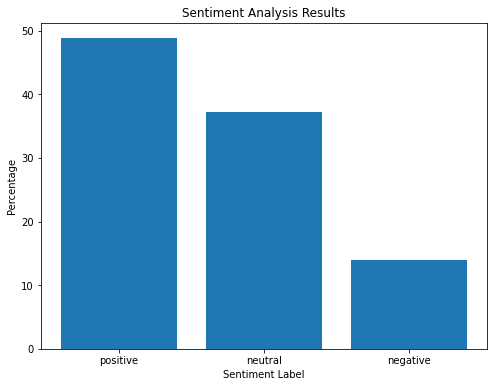

In [63]:
#### Create a bar chart of the sentiment counts
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)

# Add labels and title
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment Label')
plt.ylabel('Percentage')

# Display the plot
plt.show()

### Insights

Based on the sentiment analysis of the 500,000 tweets about GPT, the majority of tweets **(48.82%) express a positive sentiment**, followed by **neutral tweets (37.18%)**,<br/>
and a smaller proportion of **negative tweets (13.99%)**. <br/>
This suggests that overall, the **public perception of GPT is largely positive**, which is encouraging for companies and researchers developing and using AI-powered conversational technologies. <br/> 
However, it is important to note that this sentiment analysis only captures a snapshot of public opinion at a given time and may not be representative of the entire population

In [64]:
df3 = df2.copy()

**Goal2**: To examine Sentiment trends over time

In [65]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [66]:
# Convert the date column to a pandas datetime format
df3['date'] = pd.to_datetime(df3['date'])

In [67]:
# Group the tweets by date and sentiment label
sentiment_by_date = df3.groupby(['date', 'sentiment_label']).size().unstack(fill_value=0)

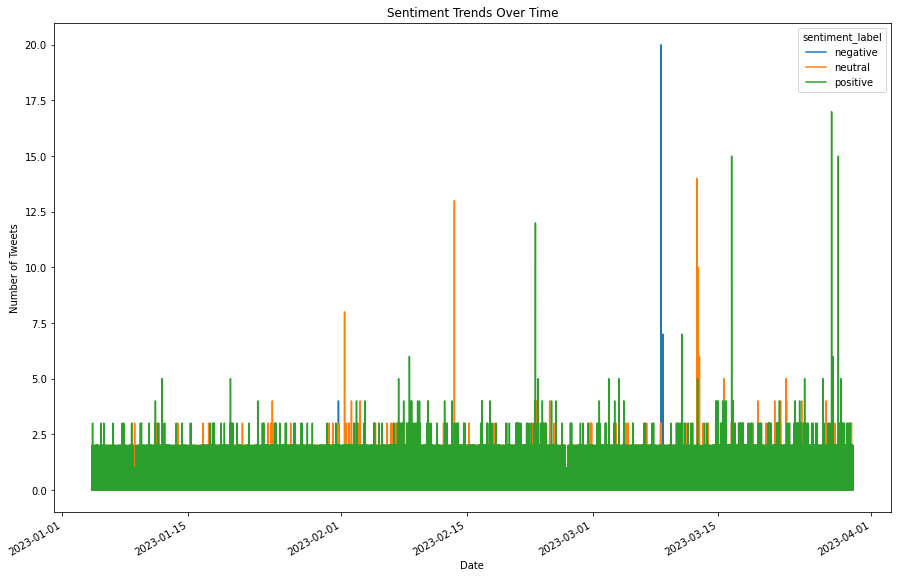

In [68]:
# Plot the sentiment trends over time
sentiment_by_date.plot(kind='line', figsize=(15, 10))

# Add labels and title
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')

# Display the plot
plt.show()

Looks like there is a spike in negative tweets about AI and GPT between March 8 and March 10, Let us zoom in incase we can connect this to an event or occurence

In [ ]:
sentiment_by_date.plot(kind='line', figsize=(10, 6), xlim=('2023-03-08', '2023-03-10'))

# Add labels and title
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')

# Display the plot
plt.show()

Let us bring up tweets from March 8 from 1pm which has a negative sentiment

In [70]:
# Filter the rows
mask = (df3['date'].dt.date == pd.to_datetime('2023-03-08').date()) & (df3['date'].dt.hour >= 13) & (df3['date'].dt.hour < 24) & (df3['sentiment_label'] == 'negative')
filtered_df = df3.loc[mask]

In [71]:
# Get the content column
content_list = filtered_df['content'].tolist()
content_list

[' Why Chat GPT has completely omitted abortion from its response. When confronted with the fact that abortion is the number one cause of children death, Chat GPT agreed.Is wokesim inductrinating AI? Sadly, Chat GPT has intentionally given inaccurate information to the public🔥',
 '  Chat GPT keeping it humble',
 'I received my first e-mail likely written by  requesting information about Egyptology in France, which I interpreted as a hoax. I asked Chat GPT to write the answer in the same style and signed Fr. Colin, Artificial Professor of Egyptology. En fait, la parade est simple.',
 'Noam Chomsky: The False Promise of  ',
 'The Guinness World Record for the longest video game marathon is 48 hours, and it was set in January 2020 in Spain.',
 'Does an AI system know if it’s bias?\xa0We discuss on episode 111 “CHATGPT: Artificial Intelligence Bias and Human Nature” available everywhere!   ▶︎ WATCH ',
 'The average person will spend 6 months of their life waiting at red lights.',
 'Experim

**Insights**

Based on the filtered data, it appears that on March 8th, there was an increase in negative sentiment tweets about GPT during the time period from 1:00 PM to 11:59 PM. <br/> This may suggest that a particular event or news related to GPT occurred during this time period that led to a spike in negative sentiment among Twitter users. <br/> Further analysis may be required to identify the cause of this increase in negative sentiment and to determine its potential impact on the perception and adoption of GPT in the long term.

In [72]:
df4 = df3.copy()

**Goal3:** To examine Sentiment by user

In [73]:
# First identify total users in our dataset

df4.username.nunique()

249998

250k users

In [74]:
sentiment_by_user = df4.groupby('username')['sentiment_polarity'].mean().reset_index()

In [75]:
sentiment_by_user

,username,sentiment_polarity
0,000000000000oh,0.000000
1,0000Origins,0.100000
2,000Dave,0.226042
3,000_Mike_000,0.166667
4,000dotpls,-0.033333
...,...,...
249993,zzongiszzang,0.000000
249994,zzsaif777,0.500000
249995,zzz_jah,0.400000
249996,zzzwind,0.000000


In [76]:
sorted_sentiment_by_user = sentiment_by_user.sort_values(by='sentiment_polarity', ascending=False)
sorted_sentiment_by_user

,username,sentiment_polarity
121985,WildernessMel,1.0
97513,SAshley67417039,1.0
154322,deerichguy,1.0
160353,elise81,1.0
114097,Thompso10120230,1.0
...,...,...
227404,skelenot,-1.0
249169,zakkyrak,-1.0
124078,Yudddhh,-1.0
161632,erito25456483,-1.0


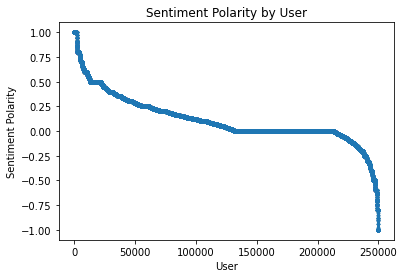

In [77]:

# Create a scatter plot of sentiment polarity values
plt.scatter(range(len(sorted_sentiment_by_user)), sorted_sentiment_by_user['sentiment_polarity'], s=5)
plt.title('Sentiment Polarity by User')
plt.xlabel('User')
plt.ylabel('Sentiment Polarity')
plt.show()

**Insights**

From the analysis of sentiment by tweeters, we can identify tweeters who have an overall positive or negative sentiment towards GPT and AI.  For example, we can see which users have a **polarity score of +1**, indicating an extremely positive sentiment towards GPT and AI. <br/> These users may be potential brand ambassadors for GPT and AI, and their positive sentiment may influence others to have a favorable view of GPT and AI. On the other hand, we can also identify users with an extremely negative sentiment towards GPT and AI, with a **polarity score of -1**. <br/> These users may be potential detractors, and their negative sentiment may influence others to have an unfavorable view of GPT and AI.

By sorting the sentiment_by_user dataframe based on the sentiment_polarity column, we can easily identify the users with the most positive or negative sentiment towards GPT and AI. <br/> This information can be used by companies, researchers, and policymakers to identify potential advocates or detractors of GPT and AI and engage with them accordingly.

In [78]:
df5 = df4.copy()

**Goal4:** WordCloud Analysis

In [79]:
from wordcloud import WordCloud

In [80]:
# Combine all the tweets into one string
all_tweets = " ".join(df5['content'].astype(str))

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords={'ChatGPT'}).generate(all_tweets)

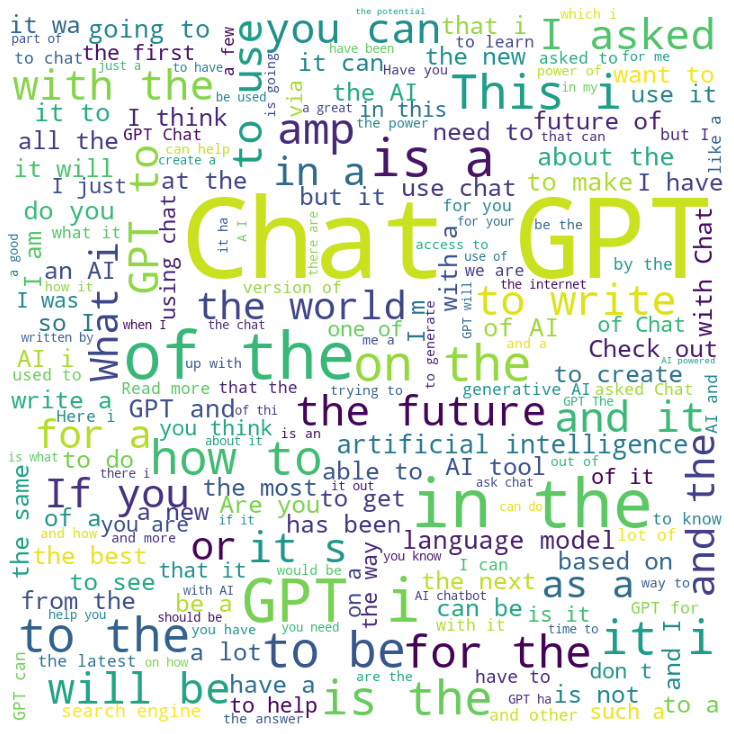

In [81]:
# Display the generated image
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [82]:
df6 = df5.copy()

In [84]:
df6

,date,id,content,username,like_count,retweet_count,sentiment_polarity,sentiment_label
0,2023-03-29 22:58:21+00:00,1641213230730051584,"Free AI marketing and automation tools, strate...",RealProfitPros,0.0,0.0,0.268182,positive
1,2023-03-29 22:58:18+00:00,1641213218520481805,Chat GPT says it’s 15. 😂,AmyLouWho321,0.0,0.0,0.000000,neutral
2,2023-03-29 22:57:53+00:00,1641213115684536323,- Chat with any PDF!Check out how this new AI...,yjleon1976,0.0,0.0,0.061174,positive
3,2023-03-29 22:57:52+00:00,1641213110915571715,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0.0,0.0,0.000000,neutral
4,2023-03-29 22:57:26+00:00,1641213003260633088,Most people haven't heard of Chat GPT yet.Firs...,nikocosmonaut,0.0,0.0,0.083333,positive
...,...,...,...,...,...,...,...,...
500031,2023-01-04 07:18:08+00:00,1610536038094757888,Versus ?! Who cares? Lamda isn't available...,Pup_In_Cup,1.0,0.0,-0.087500,negative
500032,2023-01-04 07:17:50+00:00,1610535961670172674,So much Never trust a system you don't admin.,TryingToOffend,2.0,0.0,0.200000,positive
500033,2023-01-04 07:17:20+00:00,1610535837363486720,all my twitter feed is about ChatGPT and lol 😆,mcp350,3.0,1.0,0.800000,positive
500034,2023-01-04 07:17:08+00:00,1610535786017091584,I'm quite amazed by Chat GPT. A really promisi...,manumurali369,1.0,0.0,0.200000,positive


<a id='hashtagsanalysis'></a>
### Hashtag Analysis

**Goal:**  To identify the most frequently used hashtags in tweets related to GPT. This will help us understand the most popular topics and trends related to GPT on social media, and potentially use these hashtags to reach a wider audience.

In [ ]:
df6.hashtags.tolist()

In [ ]:
from collections import Counter

In [ ]:
# count the frequency of each hashtag and store in a new dataframe
# count the frequency of each hashtag and store in a new dataframe
hashtag_freq = pd.DataFrame.from_dict(Counter(tag for tags in df6['hashtags'] for tag in tags.split()), orient='index').reset_index()
hashtag_freq.columns = ['hashtag', 'count']

In [ ]:
hashtag_freq

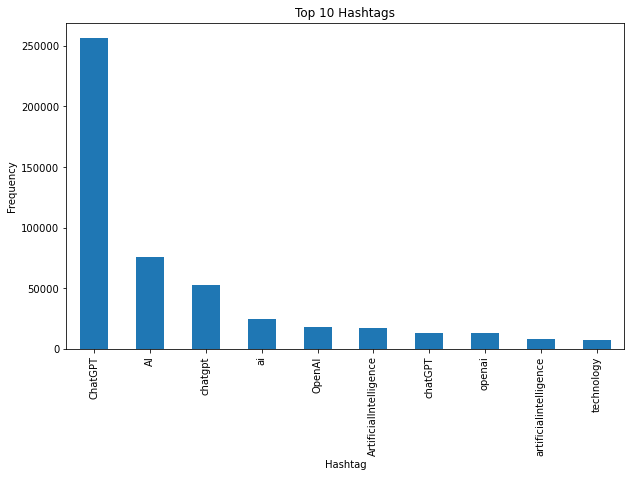

In [49]:
# plot top 10 most frequently used hashtags
hashtag_freq.sort_values('count', ascending=False).head(10).plot(kind='bar', figsize=(10, 6), x='hashtag', y='count', legend=None)
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.show()

**Insights**

The hashtag analysis shows that people tweeting about GPT are also using related hashtags such as **ChatGPT, AI, OpenAI, technology, and others**. This suggests that GPT is a topic of interest among individuals and organizations interested in the broader field of artificial intelligence and related technologies. By leveraging these hashtags in social media posts, businesses and organizations can potentially reach a wider audience interested in these topics.

In [85]:
df7= df6.copy()

<a id='influenceranalysis'></a>
### Influencer Analysis

**Goal** The goal of influencer analysis is to identify the Twitter users who are most influential in discussing GPT and engaging with them to potentially increase the reach and visibility of your brand. By computing metrics such as the number of retweets and likes, we can identify the most active and engaged users and target them for engagement strategies.

In [86]:
df7.head(1)

,date,id,content,username,like_count,retweet_count,sentiment_polarity,sentiment_label
0,2023-03-29 22:58:21+00:00,1641213230730051584,"Free AI marketing and automation tools, strate...",RealProfitPros,0.0,0.0,0.268182,positive


In [87]:
# compute total retweets and likes for each user
user_metrics = df7.groupby('username').agg({'retweet_count': 'sum', 'like_count': 'sum'}).reset_index()

In [88]:
user_metrics

,username,retweet_count,like_count
0,000000000000oh,0.0,0.0
1,0000Origins,0.0,0.0
2,000Dave,2.0,14.0
3,000_Mike_000,0.0,0.0
4,000dotpls,1.0,5.0
...,...,...,...
249993,zzongiszzang,0.0,0.0
249994,zzsaif777,0.0,1.0
249995,zzz_jah,0.0,14.0
249996,zzzwind,0.0,1.0


In [89]:
sorted_by_likes = user_metrics.sort_values(by='like_count', ascending=False)
sorted_by_retweets = user_metrics.sort_values(by='retweet_count', ascending=False)

In [90]:
sorted_by_likes

,username,retweet_count,like_count
31077,DataChaz,25738.0,122802.0
76869,MoistCr1TiKaL,2624.0,64094.0
182612,johnvianny,16098.0,63877.0
218208,rgay,1349.0,44940.0
128376,aaronsiim,11710.0,42934.0
...,...,...,...
75384,Mighty_mike247,0.0,0.0
168158,gomslhi,0.0,0.0
75387,Mignightxwn,0.0,0.0
168156,gomezajoshua,0.0,0.0


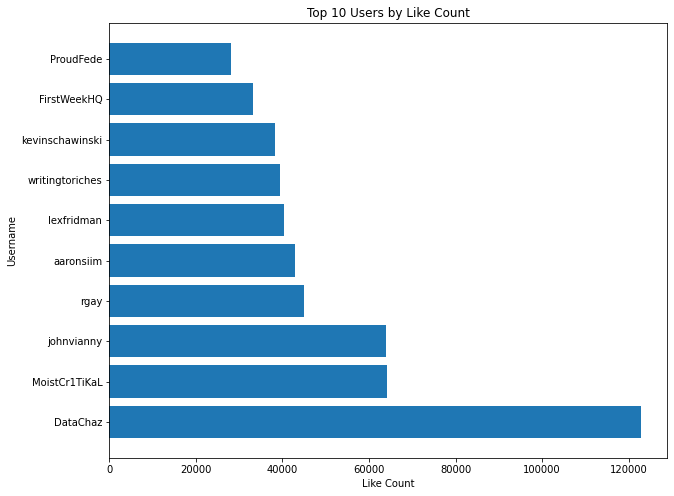

In [92]:
# Select the top 10 rows based on like counts
top_10_users = sorted_by_likes.head(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(range(len(top_10_users)), top_10_users['like_count'])
plt.yticks(range(len(top_10_users)), top_10_users['username'])
plt.xlabel('Like Count')
plt.ylabel('Username')
plt.title('Top 10 Users by Like Count')
plt.show()

In [56]:
sorted_by_retweets

,username,retweet_count,like_count
31077,DataChaz,25738.0,122802.0
182612,johnvianny,16098.0,63877.0
128376,aaronsiim,11710.0,42934.0
246840,writingtoriches,10712.0,39425.0
166286,garryflix,8194.0,13690.0
...,...,...,...
94225,ReginaProblem,0.0,0.0
94226,ReginaWalton,0.0,5.0
94227,ReginaeCor,0.0,0.0
94228,ReginaldAndreas,0.0,9.0


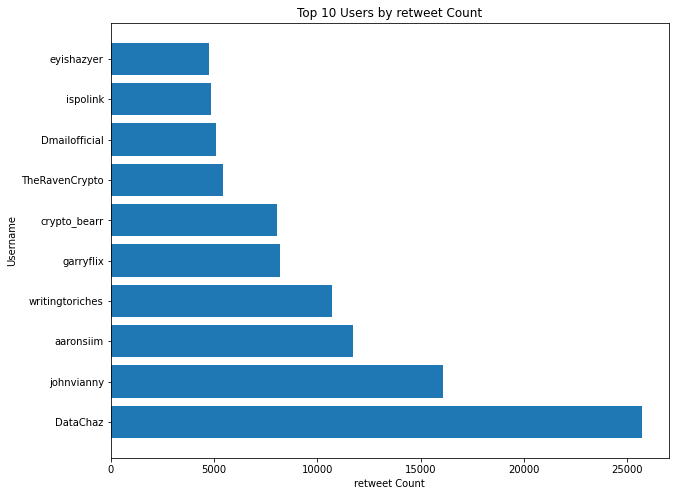

In [94]:
# Select the top 10 rows based on like counts
top_10_users = sorted_by_retweets.head(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(range(len(top_10_users)), top_10_users['retweet_count'])
plt.yticks(range(len(top_10_users)), top_10_users['username'])
plt.xlabel('retweet Count')
plt.ylabel('Username')
plt.title('Top 10 Users by retweet Count')
plt.show()

**Insights**

From our influencer analysis, we can see that there are several Twitter users who have a high number of likes and retweets on their tweets related to GPT. These influencers include **DataChaz, johnvianny, and many others**. By engaging with these influencers, businessess and organizations can potentially reach a wider audience and increase brand visibility. By  retweet or mention their tweets, or offer them incentives such as discounts or free trials to further promote business brand.

In [57]:
df8 =df7.copy()

<a id='conclusions'></a>
### Conclusions

After analyzing the data related to GPT and AI-powered conversational technologies on Twitter, we have gained several insights that can be used to improve business strategies and brand visibility.

First, in the data cleanup stage, we removed all null entries, then URLs, mentions, and hashtags from the tweets. We then performed sentiment analysis to understand the general public opinion towards GPT and AI-powered conversational technologies. The sentiment analysis showed that the majority of tweets had a positive sentiment towards GPT, with a positivity rate of 48.82%. The sentiment trend over time also showed a positive sentiment towards GPT, with occasional fluctuations. We also examined sentiment by user to identify users with a positive and negative sentiment about GPT and AI. Finally, we performed a WordCloud analysis of the tweets, which highlighted the most commonly used words in tweets related to GPT.

In addition, we performed a Hashtag Analysis to identify the most frequently used hashtags in tweets related to GPT. The top hashtags included #Chatbot, #AI, #MachineLearning, and #NLP, among others. This analysis will help businesses and organizations understand the most popular topics and trends related to GPT on social media, and potentially use these hashtags to reach a wider audience.

We also conducted Influencer Analysis to identify the Twitter users who are most influential in discussing GPT. The influencers included DataChaz, johnvianny, and many others. By engaging with these influencers, businesses and organizations can potentially reach a wider audience and increase brand visibility. By retweeting or mentioning their tweets, or offering them incentives such as discounts or free trials, businesses can further promote their brand.

Overall, these analyses have provided valuable insights into the public opinion, popular topics, and influential users related to GPT on social media. By leveraging these insights, businesses and organizations can improve their social media strategy and potentially increase their reach and engagement with their target audience.